Nesse arquivo utilizamos uma abordagem mais complexa. Diante de cada caminho possuimos diversas variáveis 
(4 no total, cada variável representa um roteador no momento em que o usuario captura a informação). 

E fica a pergunta de:

>Como podemos melhor utilizar esses dados?

Aqui apresentamos uma estratégia de estrair informações de uma séries temporais através de [Wavelet](https://cran.r-project.org/web/packages/wavelets/wavelets.pdf).
Simplementes tentamos extrair o máximo de informações que possam mostrar a similaridade ou disimilaridade de cada série. Para isso usamos a decomposição da série, extraindo mais detalhes da série.

Aqui usamos o método **DWT**(Discrete Wavelet Transforms) com um filtro **haar** (são os filtro mais simples, básico degrais unitários, utilizados também em processamento de imagem como no algoritmo de viola jones para detecção de faces), mas como já havia dito, isso é apenas uma das diversas estratégias possíveis. Poderiamos usar **DFT**(acredito que **DFT** não é uma boa escolha desde que **DWT** trabalha melhor que **DFT**(Discrete Fourier Transform) em diversos artigos usando bases temporais (som, video, etc...) como é o nosso caso) ou outros filtros e até  mesmo criar novos filtros.

In [12]:
library(wavelets)
library(caret)
library(kernlab)
library(pROC)

print("Target")
groups <- read.csv(file="./MovementAAL/groups/MovementAAL_DatasetGroup.csv",head=TRUE,sep=",")
targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")
head(targetAll)



[1] "Target"


,X.sequence_ID,class_label
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


In [2]:
#Group 1
allDataGroup1<-list()
allDataGroup1Target<-list()
groups1 = groups[groups$dataset_ID==1, ]

index<-1
for (id in groups1$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup1[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup1Target[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 17
for (i in 1:length(allDataGroup1)){
     aMatrix <- data.matrix(allDataGroup1[[i]], rownames.force = NA)
     wt <- dwt(aMatrix[1:minStepsBack,], filter="haar", boundary="periodic")
     wtData <- rbind(wtData, unlist(c(wt@W,wt@V[[wt@level]])))
}
wtData <- as.data.frame(wtData)
data = unlist(allDataGroup1Target)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
tail(frameDataFinal)

,target,W11,W12,W13,W14,W15,W16,W17,W18,W19,ellip.h,W37,W38,W41,W42,W43,W44,W51,W52,W6,V67
99,No,0.1010173,-0.235707,-0.1010173,0.134689,0.1010102,0.1346897,0.06734485,0.3703896,0.006731657,<8b>,-0.08838835,0.1414214,-0.3004702,-0.3395225,-0.079165,0.2625,0.1111164,-0.2390728,-3.645356,-3.041544
100,No,0.1010173,-0.3703903,-0.3030448,4.98733e-18,0.1010102,4.98733e-18,0.3030448,-0.03367172,0.1979899,<8b>,-0.265165,0.05303301,-0.06095275,-0.1728575,-0.3958275,-0.6,-0.4427866,-0.09638396,-3.447086,-2.766606
101,No,1.303753e-17,-0.3367179,0.2020345,0.1010173,-0.06734485,6.396793e-18,-0.4713998,0.03367242,0.3676955,<8b>,-0.265165,-0.1414214,-0.4019,-0.049047,-0.1583325,-0.2375,-0.9936526,-0.2689534,-3.505893,-2.23875
102,No,-1.637145e-17,-0.2020275,0.1010102,0.03367242,0.2020345,4.911436e-17,-0.3030518,0.03367384,0.2788051,<8b>,-0.6187184,-0.3712311,-0.0038105,-0.4528575,-0.1065425,0.375,-0.6071021,0.07029172,-4.076132,-1.323275
103,No,-0.2357006,6.396793e-18,0.03367242,-0.06734485,0.1010173,-0.1010173,0.1683558,0.3030448,0.4363839,<8b>,-0.1414214,-0.08838835,-0.01523525,-0.1733325,-0.1845275,0.3625,-0.226944,-0.3202999,-4.378155,-1.443873
104,No,0.1683551,0.6060895,9.730714e-18,4.98733e-18,6.396793e-18,-1.637145e-17,6.396793e-18,0.1010173,0.7555931,<8b>,-0.1237437,0.212132,-0.0447625,-1.259047,-0.37976,-0.7125,0.2175237,0.4541499,-3.905772,-1.211492


#### Média e Desvio padrão respectivamente.
##### Group 1, com Cross Validation tipo 10-fold

In [3]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracyGroup1 <- c()

for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training,
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracyGroup1 <- c(allAccuracyGroup1,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup1)
sd(allAccuracyGroup1)

[1] 0.6866667

[1] 0.07235031

In [4]:
#Group 2
allDataGroup2<-list()
allDataGroup2Target<-list()
groups2 = groups[groups$dataset_ID==2, ]

index<-1
for (id in groups2$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup2[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup2Target[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 17
for (i in 1:length(allDataGroup2)){
     aMatrix <- data.matrix(allDataGroup2[[i]], rownames.force = NA)
     wt <- dwt(aMatrix[1:minStepsBack,], filter="haar", boundary="periodic")
     wtData <- rbind(wtData, unlist(c(wt@W,wt@V[[wt@level]])))
}
wtData <- as.data.frame(wtData)
data = unlist(allDataGroup2Target)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
tail(frameDataFinal)

,target,W11,W12,W13,W14,W15,W16,W17,W18,W19,ellip.h,W37,W38,W41,W42,W43,W44,W51,W52,W6,V67
101,No,-1.147899e-17,0.0314309,-0.1571403,-1.645277e-17,-9.215718e-19,-9.215718e-19,-0.3771213,0.1257094,-0.5656854,<8b>,-0.05050864,0.0505051,-0.576065,0.5938225,0.01623375,-0.3095275,-0.8734413,0.8042903,3.13925,-1.514803
102,No,-9.215718e-19,-0.0314309,3.225501e-18,0.1257094,-0.06285472,-1.629014e-17,-1.629014e-17,0.09427855,-0.2151585,<8b>,0.2188708,0.06734485,-0.382055,0.455712,0.082791,0.083335,-0.847215,1.059506,3.500972,-1.92793
103,No,2.209062e-18,-0.219988,-3.252607e-18,2.607506e-17,-0.09427855,0.09428562,-0.1571403,-0.1257024,0.3239398,<8b>,-0.7071068,0.2525432,-0.00683675,0.5011672,-0.08117025,-0.345235,-0.4228329,0.8394929,3.484434,-0.5050059
104,No,-2.209062e-18,-2.209062e-18,0.0314309,-1.629014e-17,0.1885571,-0.09427855,-0.1885642,6.505213e-18,0.261085,<8b>,-0.1010137,-0.1010137,0.060685,0.05565475,0.3165595,-0.523805,-0.2743187,1.526326,3.828612,-0.08240287
105,No,-1.065567e-18,-1.065567e-18,0.3142665,-3.293264e-18,1.065567e-18,1.065567e-18,1.631724e-17,-0.09427855,0.3722846,<8b>,0.08417399,-0.06734485,-1.232483,-0.1083872,0.0091985,-0.535715,-0.3522323,1.818657,2.775723,-0.2762629
106,No,-1.132991e-17,0.1571319,-2.209062e-18,3.252607e-18,3.293264e-18,-2.209062e-18,2.209062e-18,-0.3142665,0.04351535,<8b>,0.1178464,-0.03366535,-1.016239,-0.1550083,0.0946965,0.250005,-0.5925023,1.504903,3.070284,0.1109921


#### Média e Desvio padrão respectivamente.
##### Group 2, com Cross Validation tipo 10-fold

In [5]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracyGroup2 <- c()

for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training,
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracyGroup2 <- c(allAccuracyGroup2,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup2)
sd(allAccuracyGroup2)

[1] 0.6258065

[1] 0.07930791

In [6]:
#Group 3
allDataGroup3<-list()
allDataGroup3Target<-list()
groups3 = groups[groups$dataset_ID==3, ]

index<-1
for (id in groups3$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup3[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup3Target[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 17
for (i in 1:length(allDataGroup3)){
     aMatrix <- data.matrix(allDataGroup3[[i]], rownames.force = NA)
     wt <- dwt(aMatrix[1:minStepsBack,], filter="haar", boundary="periodic")
     wtData <- rbind(wtData, unlist(c(wt@W,wt@V[[wt@level]])))
}
wtData <- as.data.frame(wtData)
data = unlist(allDataGroup3Target)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
tail(frameDataFinal)

,target,W11,W12,W13,W14,W15,W16,W17,W18,W19,ellip.h,W37,W38,W41,W42,W43,W44,W51,W52,W6,V67
99,No,-2.482823e-17,-0.03214507,2.168404e-19,-0.09642815,-0.032138,2.797242e-17,0.1607042,2.526191e-17,0.05642712,<8b>,0.5867392,-0.1203566,-0.0752525,0.6333325,-0.03451375,-0.05318275,0.05035307,0.3545596,3.351799,-1.363856
100,No,1.398621e-17,-0.1928492,-0.09642108,2.797242e-17,2.797242e-17,2.797242e-17,2.797242e-17,0,0.3771213,<8b>,-0.4513441,-0.2557641,-0.040155,0.24445,-0.105911,0.627659,0.6915681,-0.03760571,3.11207,-2.399295
101,No,0.1285662,1.398621e-17,2.168404e-19,-0.2571323,0.1928492,-0.1285662,2.526191e-17,2.526191e-17,-0.2935554,<8b>,0.1053094,-0.2858479,-0.2886375,0.0222225,0.7621752,0.08511,0.1076676,0.459365,3.98536,-0.1669201
102,No,0.09642815,2.482823e-17,0.1285662,-5.319367e-18,0.06428308,2.526191e-17,2.526191e-17,0.2571323,-0.1335654,<8b>,-0.04513816,0.3159388,-0.5275275,1.25e-06,0.5158377,-0.191485,0.02017994,0.9040274,3.547129,-0.570297
103,No,2.168404e-19,2.168404e-19,-0.1607042,2.753874e-17,-8.348357e-18,2.526191e-17,2.526191e-17,2.482823e-17,0.1207102,<8b>,-0.06017832,0.03008386,-0.0762625,0.144445,0.4423137,-0.042555,0.06214585,1.09342,3.537199,-0.5729086
104,No,0.1928422,-0.06428308,-1.669671e-17,-1.669671e-17,-1.669671e-17,2.753874e-17,2.753874e-17,-0.09642108,-0.1285662,<8b>,0.7823253,0.1955822,-0.62853,0.5111075,0.4215105,0.585105,0.3937365,1.047117,3.329233,-0.9164797


#### Média e Desvio padrão respectivamente.
##### Group 3, com Cross Validation tipo 10-fold

In [7]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracyGroup3 <- c()

for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training,
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracyGroup3 <- c(allAccuracyGroup3,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup3)
sd(allAccuracyGroup3)

[1] 0.4806452

[1] 0.06352282

In [8]:
#All Groups
allData<-list()
allDataTarget<-list()
targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")

index<-1
for (id in targetAll$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allData[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataTarget[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 17
for (i in 1:length(allData)){
     aMatrix <- data.matrix(allData[[i]], rownames.force = NA)
     wt <- dwt(aMatrix[1:minStepsBack,], filter="haar", boundary="periodic")
     wtData <- rbind(wtData, unlist(c(wt@W,wt@V[[wt@level]])))
}
wtData <- as.data.frame(wtData)
data = unlist(allDataTarget)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
tail(frameDataFinal)

,target,W11,W12,W13,W14,W15,W16,W17,W18,W19,ellip.h,W37,W38,W41,W42,W43,W44,W51,W52,W6,V67
309,No,-2.482823e-17,-0.03214507,2.168404e-19,-0.09642815,-0.032138,2.797242e-17,0.1607042,2.526191e-17,0.05642712,<8b>,0.5867392,-0.1203566,-0.0752525,0.6333325,-0.03451375,-0.05318275,0.05035307,0.3545596,3.351799,-1.363856
310,No,1.398621e-17,-0.1928492,-0.09642108,2.797242e-17,2.797242e-17,2.797242e-17,2.797242e-17,0,0.3771213,<8b>,-0.4513441,-0.2557641,-0.040155,0.24445,-0.105911,0.627659,0.6915681,-0.03760571,3.11207,-2.399295
311,No,0.1285662,1.398621e-17,2.168404e-19,-0.2571323,0.1928492,-0.1285662,2.526191e-17,2.526191e-17,-0.2935554,<8b>,0.1053094,-0.2858479,-0.2886375,0.0222225,0.7621752,0.08511,0.1076676,0.459365,3.98536,-0.1669201
312,No,0.09642815,2.482823e-17,0.1285662,-5.319367e-18,0.06428308,2.526191e-17,2.526191e-17,0.2571323,-0.1335654,<8b>,-0.04513816,0.3159388,-0.5275275,1.25e-06,0.5158377,-0.191485,0.02017994,0.9040274,3.547129,-0.570297
313,No,2.168404e-19,2.168404e-19,-0.1607042,2.753874e-17,-8.348357e-18,2.526191e-17,2.526191e-17,2.482823e-17,0.1207102,<8b>,-0.06017832,0.03008386,-0.0762625,0.144445,0.4423137,-0.042555,0.06214585,1.09342,3.537199,-0.5729086
314,No,0.1928422,-0.06428308,-1.669671e-17,-1.669671e-17,-1.669671e-17,2.753874e-17,2.753874e-17,-0.09642108,-0.1285662,<8b>,0.7823253,0.1955822,-0.62853,0.5111075,0.4215105,0.585105,0.3937365,1.047117,3.329233,-0.9164797


#### Média e Desvio padrão respectivamente.
##### Todos os Groups em uma base apenas, com Cross Validation tipo 10-fold

In [9]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracy <- c()

for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training,
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracy <- c(allAccuracy,matrix[3]$overall[[1]])
}

mean(allAccuracy)
sd(allAccuracy)

[1] 0.6172043

[1] 0.04539395

#### Matrix de confusão
#### Todos os Groups em uma base apenas

In [10]:
#All groups datasets Confusion Matrix 
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=1)
training <- frameDataFinal[ inTraining[[1]],]
testing  <- frameDataFinal[-inTraining[[1]],]
fitControl <- trainControl(method = "none", classProbs = TRUE)

svmLinearFit <- train(target ~ ., data = training,
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
preds<- predict(svmLinearFit, newdata = testing)
matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[1]]])
matrix

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  22  12
       Yes 24  35
                                          
               Accuracy : 0.6129          
                 95% CI : (0.5062, 0.7122)
    No Information Rate : 0.5054          
    P-Value [Acc > NIR] : 0.02405         
                                          
                  Kappa : 0.2236          
 Mcnemar's Test P-Value : 0.06675         
                                          
            Sensitivity : 0.4783          
            Specificity : 0.7447          
         Pos Pred Value : 0.6471          
         Neg Pred Value : 0.5932          
             Prevalence : 0.4946          
         Detection Rate : 0.2366          
   Detection Prevalence : 0.3656          
      Balanced Accuracy : 0.6115          
                                          
       'Positive' Class : No              
                                          

#### Curva ROC e AUC
#### Todos os Groups em uma base apenas


Call:
roc.default(response = classes, predictor = outcome, levels = c("No",     "Yes"))

Data: outcome in 46 controls (classes No) < 47 cases (classes Yes).
Area under the curve: 0.7072

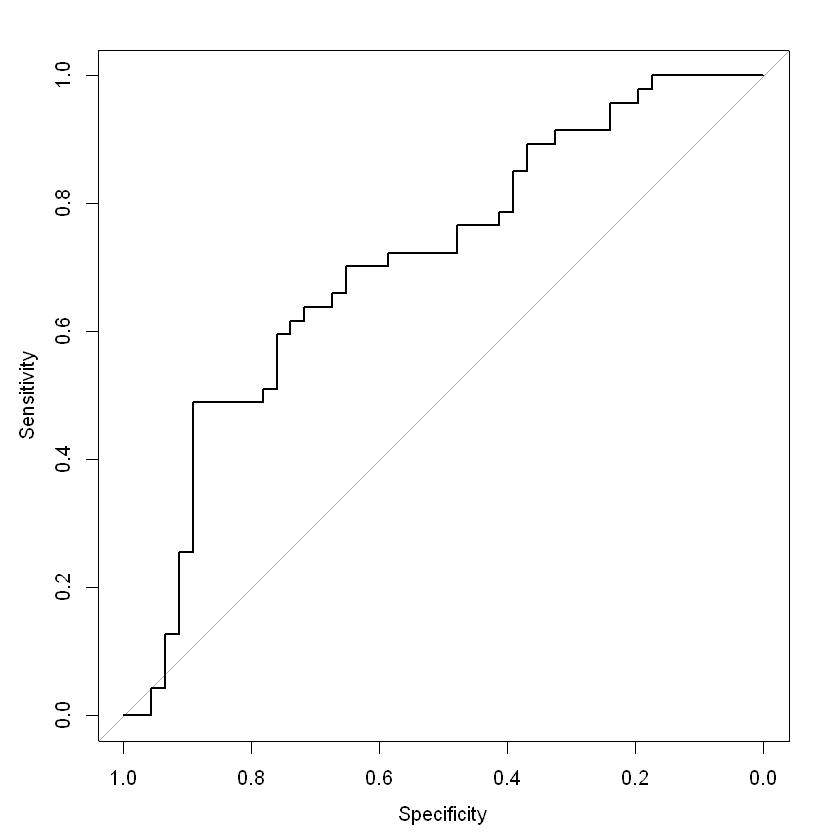

In [11]:
#ROC CURVE AND AUC
predsProb<- predict(svmLinearFit, newdata = testing,type="prob")
outcome<- predsProb[,2]
classes <- frameDataFinal$target[-inTraining[[1]]]
rocobj <- roc(classes, outcome,levels=c("No","Yes"))
plot(rocobj)